<a href="https://colab.research.google.com/github/Arinjay11000/Minor-Projects/blob/main/Stock%20Price/Stock_Price_movement_prediction_based_on_news_headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Combined_News_DJIA.csv")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [ ]:
df.dropna(subset=["Top24","Top25","Top23"],how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1986 non-null   object
 1   Label   1986 non-null   int64 
 2   Top1    1986 non-null   object
 3   Top2    1986 non-null   object
 4   Top3    1986 non-null   object
 5   Top4    1986 non-null   object
 6   Top5    1986 non-null   object
 7   Top6    1986 non-null   object
 8   Top7    1986 non-null   object
 9   Top8    1986 non-null   object
 10  Top9    1986 non-null   object
 11  Top10   1986 non-null   object
 12  Top11   1986 non-null   object
 13  Top12   1986 non-null   object
 14  Top13   1986 non-null   object
 15  Top14   1986 non-null   object
 16  Top15   1986 non-null   object
 17  Top16   1986 non-null   object
 18  Top17   1986 non-null   object
 19  Top18   1986 non-null   object
 20  Top19   1986 non-null   object
 21  Top20   1986 non-null   object
 22  Top21   1986 non-null   

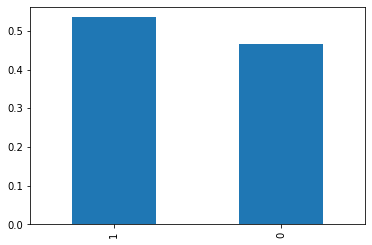

In [ ]:
df["Label"].value_counts(normalize=True).plot(kind="bar")
plt.show()

In [ ]:
cols=["Date","Label"]
cols=cols+[i for i in range(1,26)]
df.columns=cols
df.head()

,Date,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Bo

In [ ]:
df[1][2]

"b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'"

In [ ]:
df.index=[i for i in range(1986)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1986 non-null   object
 1   Label   1986 non-null   int64 
 2   1       1986 non-null   object
 3   2       1986 non-null   object
 4   3       1986 non-null   object
 5   4       1986 non-null   object
 6   5       1986 non-null   object
 7   6       1986 non-null   object
 8   7       1986 non-null   object
 9   8       1986 non-null   object
 10  9       1986 non-null   object
 11  10      1986 non-null   object
 12  11      1986 non-null   object
 13  12      1986 non-null   object
 14  13      1986 non-null   object
 15  14      1986 non-null   object
 16  15      1986 non-null   object
 17  16      1986 non-null   object
 18  17      1986 non-null   object
 19  18      1986 non-null   object
 20  19      1986 non-null   object
 21  20      1986 non-null   object
 22  21      1986 non-null   

In [ ]:
df.iloc[:,2:27]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved

In [ ]:
for i in range(1,26):
  for j in range(1986):
    df[i][j]=str(df[i][j])
    df[i][j]=df[i][j][1:]
    df[i][j]=re.sub("[^a-zA-Z]"," ",df[i][j])
    df[i][j]=df[i][j].lower()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Date,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,2008-08-08,0,georgia downs two russian warplanes as coun...,breaking musharraf to be impeached,russia today columns of troops roll into sou...,russian tanks are moving towards the capital ...,afghan children raped with impunity u n o...,russian tanks have entered south ossetia ...,breaking georgia invades south ossetia russ...,the enemy combatent trials are nothing but ...,georgian troops retreat from s osettain capi...,did the u s prep georgia for war with russia,rice gives green light for israel to attack i...,announcing class action lawsuit on behalf of ...,so russia and georgia are at war and the ny...,china tells bush to stay out of other countri...,did world war iii start today,georgia invades south ossetia if russia get...,al qaeda faces islamist backlash,condoleezza rice the us would not act to pr...,this is a busy day the european union has a...,georgia will withdraw soldiers from ira...,why the pentagon thinks attacking iran is a b...,caucasus in crisis georgia invades south oss...,indian shoe manufactory and again in a ser...,visitors suffering from mental illnesses bann...,no help for mexico s kidnapping surge
1,2008-08-11,1,why wont america and nato help us if they wo...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli t...,georgian army flees in disarray as russians a...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeal...,russia angered by israeli military sale to ge...,an american citizen living in s ossetia blame...,welcome to world war iv now in high definiti...,georgia s move a mistake of monumental propo...,russia presses deeper into georgia u s says...,abhinav bindra wins first ever individual oly...,u s ship heads for arctic to define territory,drivers in a jerusalem taxi station threaten ...,the french team is stunned by phelps and the ...,israel and the us behind the georgian aggress...,do not believe tv neither russian nor georg...,riots are still going on in montreal canada ...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states ove...,perhaps the question about the georgia ru...,russia is so much better at war,so this is what it s come to trading sex for...
2,2008-08-12,0,remember that adorable year old who sang at...,russia ends georgia operation,if we had no sexual harassment we would have...,al qa eda is losing support in iraq because o...,ceasefire in georgia putin outmaneuvers the ...,why microsoft and intel tried to kill the xo ...,stratfor the russo georgian war and the bala...,i m trying to get a sense of this whole georg...,the us military was surprised by the timing a...,u s beats war drum as iran dumps the dollar,gorbachev georgian military attacked the so...,cnn use footage of tskhinvali ruins to cover ...,beginning a war as the olympics were opening ...,pyramids as large as the luxor stacked int...,the top party cities in the world,u s troops still in georgia did you know th...,why russias response to georgia was right,gorbachev accuses u s of making a serious b...,russia georgia and nato cold war two,remember that adorable year old who led yo...,war in georgia the israeli connection,all signs point to the us encouraging georgia...,christopher king argues that the us and nato ...,america the new mexico,bbc news asia pacific extinction by man ...
3,2008-08-13,0,u s refuses israel weapons to attack iran ...,when the president ordered to attack tskhinva...,israel clears troops who killed reuters came...,britain s policy of being tough on drugs is ...,body of year old found in trunk latest r...,china has moved million quake survivors ...,bush announces operation get all up in russia...,russian forces sink georgian ships,the commander of a navy air reconnaissance sq...,of cnn readers russia s actions in georg...,usa to send fleet into bl

In [ ]:
headline=[]
for j in range(1986):
  headline.append(" ".join(str(x) for x in df.iloc[j,2:27]))
headline[0]

' georgia  downs two russian warplanes  as countries move to brink of war   breaking  musharraf to be impeached    russia today  columns of troops roll into south ossetia  footage from fighting  youtube    russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire   afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing       russian tanks have entered south ossetia whilst georgia shoots down two russian jets    breaking  georgia invades south ossetia  russia warned it would intervene on so s side   the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it    georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video    did the u s  prep georgia for war with russia    rice gives green light for 

In [ ]:
w=WordNetLemmatizer()
for i in range(len(headline)):
  k=headline[i].split()
  k=[w.lemmatize(word) for word in k if not word in stopwords.words('english')]
  headline[i]=" ".join(k)
headline[0]

In [ ]:
len(headline)

1986

In [ ]:
tf=TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X=tf.fit_transform(headline).toarray()
X.shape

(1986, 5000)

In [ ]:
Y=df.iloc[:,1]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10,stratify=Y)
sm=SMOTE(random_state=0)
X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)
print(sum(Y_train_res==1))
print(sum(Y_train_res==0))

849
849


0.5050251256281407
              precision    recall  f1-score   support

           0       0.47      0.48      0.47       185
           1       0.54      0.53      0.53       213

    accuracy                           0.51       398
   macro avg       0.50      0.50      0.50       398
weighted avg       0.51      0.51      0.51       398



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


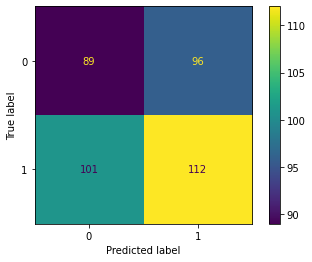

In [ ]:
model1=LogisticRegression()
model1.fit(X_train_res,Y_train_res)
Y_pred1=model1.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(classification_report(Y_test,Y_pred1))
plot_confusion_matrix(model1,X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       185
           1       0.00      0.00      0.00       213

    accuracy                           0.46       398
   macro avg       0.23      0.50      0.32       398
weighted avg       0.22      0.46      0.29       398



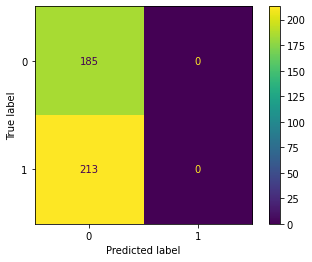

In [ ]:
model2=KNeighborsClassifier(n_neighbors=7)
model2.fit(X_train_res,Y_train_res)
Y_pred2=model2.predict(X_test)
print(classification_report(Y_test,Y_pred2))
plot_confusion_matrix(model2,X_test,Y_test)

0.5201005025125628
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       185
           1       0.55      0.59      0.57       213

    accuracy                           0.52       398
   macro avg       0.51      0.51      0.51       398
weighted avg       0.52      0.52      0.52       398



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


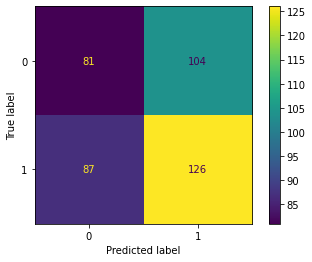

In [ ]:
model3=DecisionTreeClassifier()
model3.fit(X_train_res,Y_train_res)
Y_pred3=model3.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(classification_report(Y_test,Y_pred3))
plot_confusion_matrix(model3,X_test,Y_test)

0.4949748743718593
              precision    recall  f1-score   support

           0       0.45      0.39      0.42       185
           1       0.53      0.59      0.55       213

    accuracy                           0.49       398
   macro avg       0.49      0.49      0.49       398
weighted avg       0.49      0.49      0.49       398



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


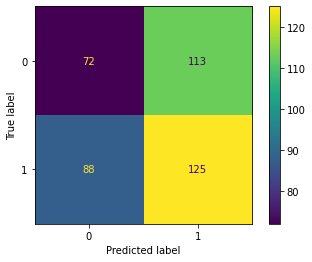

In [ ]:
model4=RandomForestClassifier(n_estimators=2000)
model4.fit(X_train_res,Y_train_res)
Y_pred4=model4.predict(X_test)
print(accuracy_score(Y_test,Y_pred4))
print(classification_report(Y_test,Y_pred4))
plot_confusion_matrix(model4,X_test,Y_test)